In [ ]:
#hide this cell when in use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!git clone https://github.com/propublica/compas-analysis/
from datetime import datetime
from sklearn.model_selection import train_test_split

fatal: destination path 'compas-analysis' already exists and is not an empty directory.


Import necessary datasets

In [ ]:
two_years_v = pd.read_csv('./compas-analysis/compas-scores-two-years-violent.csv')
two_years = pd.read_csv('./compas-analysis/compas-scores-two-years.csv')
compas = pd.read_csv('./compas-analysis/compas-scores.csv')

#convert date of birth column to age, which is not relevant for including in a separate question
dated = pd.to_datetime(compas['dob'], format="%Y-%m-%d")
year = pd.DatetimeIndex(compas['dob']).year
compas['age'] = 2024 - year

#N/A columns removed without a question for that
compas_simple = compas[['id', 'name', 'sex', 'age', 'priors_count', 'decile_score', 'score_text']].set_index('id')
compas_full = compas[compas.is_recid != -1][['id', 'name', 'sex', 'age', 'priors_count', 'race', 'decile_score', 'score_text', 'is_recid']].set_index('id')
compas_total = compas[compas.is_recid != -1][['id', 'name', 'sex', 'age', 'priors_count', 'race', 'decile_score', 'score_text', 'is_recid', 'race']].set_index('id')

# Introduction

##### Northpointe, a **for-profit company**, has created a model that generates '**risk scores**' for criminals, representing the **likelihood of reoffending**, based on several factors. You have decided to analyze their data for accuracy. Below is a table which contains defendent information. The 'decile_score' column is a number between 1-9 that represents the algorithm's output, and the 'score_text' column corresponds to a low, medium, or high score.

In [ ]:
compas_simple.head(5)

,name,sex,age,priors_count,decile_score,score_text
id,,,,,,
1,miguel hernandez,Male,77,0,1,Low
2,michael ryan,Male,39,0,5,Medium
3,kevon dixon,Male,42,0,3,Low
4,ed philo,Male,33,4,4,Low
5,marcu brown,Male,31,1,8,High


## Question 1: Understanding the Data

Part 11.2 Learning Goals:
1. Recognize the potential to abuse science for social and political ends.
Show heightened caution in situations in which science involves the study of human groups and subsequent validation of societal power structures.
2. Recognize that you yourself are always involved in some social dynamic that may be relevant to the assessment of any particular study of human groups

**Question 1.1** What columns would be useful to predict whether a defendant would reoffend? What would you expect higher values to correspond to? What would we not want to include as variables when we predict? This question is open-ended and responses will vary.

_ANSWER HERE_

**Question 1.2**  Who would this algorithm be used by, and what for? Please include second-order and higher-order uses. The context is not limited to what was introduced at the beginning.

_ANSWER HERE_

**Question 1.3 (code)** - We're interested in seeing whether certain factors are correlated with decile scores. We've split our original data into a training and test set. Using your answers from above, choose a trait from the data that interests you, and perform some exploratory data analysis using the *table* dataframe inside the EDA function to answer the next question.

The code is ungraded, but the visualizations are.

In [ ]:
train, test = train_test_split(compas_simple, test_size=0.2)
def EDA(table):
  #CODE HERE
EDA(train)

**Question 1.4** Do you see any patterns in the data? If so, please form a hypothesis of why this pattern may exist.


_ANSWER HERE_

**Question 1.5** We've loaded the test data below: the function will perform exactly same analysis you did on the training data to this dataset. Do you see the same patterns? If not, can you think of reasons why?

In [ ]:
EDA(test)
#Do not add code in this cell.

_ANSWER HERE_

# Question 2: Impacts

##### What does an accurate model mean?

 Learning Goals:
 1. Understand that there is always the inevitability of a trade-off—for a given test, one can reduce the risk of false positives by increasing the risk of false negatives, and vice versa. Holding model choice constant, one makes this trade-off when they determine what a threshold is (e.g. convict someone if you're 99% or 70% certain that they're guilty).
 2. Understand that whether false positive or negative is preferable depends on a human's value judgement on the consequences of either: (e.g. "innocent people shouldn't be in jail") and risks (e.g. dangerous people committing more crimes).

Suppose we now have access to whether the defendant actually reoffended - this data is stored in our is_recid column, which is a 1 if they recidivized, and a 0 if they did not.

In [ ]:
compas_full.head(5) #with recid column - labelled 1 if they did reoffend, and 0 otherwise

,name,sex,age,priors_count,race,decile_score,score_text,is_recid
id,,,,,,,,
1,miguel hernandez,Male,77,0,Other,1,Low,0
3,kevon dixon,Male,42,0,African-American,3,Low,1
4,ed philo,Male,33,4,African-American,4,Low,1
5,marcu brown,Male,31,1,African-American,8,High,0
6,bouthy pierrelouis,Male,51,2,Other,1,Low,0


**Question 2.1** Write code to calculate the accuracy, false_positive, and false_negative rates. (We can assume a score_text of Medium or High is a prediction that the defendant will reoffend, and a score_text of Low is a prediction the defendant will not reoffend).



In [ ]:
accuracy = ...
false_positive = ...
false_negative = ...

**Question 2.2** It seems like the accuracy of our model is pretty high (by some standards)! However, it also has a high rate of false positives compared to false negatives. What are the potential implications of a false positive or a false negative?

_ANSWER HERE_

**Question 2.3** In this scenario, how would you balance false positives and false negatives? Which one is more harmful, and which one would the users of this algorithm be motivated to minimze? Please reference your answer to Question 1.2.

_ANSWER HERE_

**Question 2.4** Suppose that we want to calculate the accuracy, false positive, and false negatives based off the decile score, and not the score_text column. Below we have defined a function that calculates these statistics based off a given decile score threshold, which would represent a positive prediction in our algorithm. Explain any patterns you see as you increase or decrease the threshold.

In [ ]:
threshold = ...#Set by a slider maybe (or random number generator with a seed)

def hidden_function(tbl, threshold):
  true_positives = len(tbl[( (tbl.is_recid==1) &
  (tbl.decile_score >= threshold) )])
  true_negatives = len(tbl[(tbl.is_recid==0) & (tbl.decile_score < threshold) ])
  false_positives = len(tbl[((tbl.is_recid==0) & (tbl.decile_score >= threshold) ) ])
  false_negatives = len(tbl[(tbl.is_recid==1) & (tbl.decile_score < threshold) ])

  accuracy = (true_positives + true_negatives) / len(tbl)
  false_positive_rate = false_positives / len(tbl)
  false_negative_rate = false_negatives / len(tbl)
  print('Accuracy: ', accuracy)
  print('False Positive Rate: ', false_positive_rate)
  print('False Negative Rate: ', false_negative_rate)
  return [accuracy, false_positive_rate, false_negative_rate]

#Test the function out with different numbers to see how the statistics change!
#hidden_function(...)

_ANSWER HERE_

##**End of Part 1**

# PART 2 - Question 3: A Hidden Impact

Part 7.1 Learning Goals:
1. Distinguish between singular and general causation.
2. Distinguish between the evidence needed to establish singular or general causation.
3. Identify different policy implications of singular or general causation.
4. Recognize cases where omission bias and status quo bias can influence decision making, even when this results in a worse outcome.

Note: The tradeoff between false positives and negatives is sometimes driven by bias.

**Question 3.1** Calculate accuracy for black versus white defendants. The accuracy for white defendants is provided for you. You can assume the threshold is a decile score of 4.

In [ ]:
compas_full

,name,sex,age,priors_count,race,decile_score,score_text,is_recid
id,,,,,,,,
1,miguel hernandez,Male,77,0,Other,1,Low,0
3,kevon dixon,Male,42,0,African-American,3,Low,1
4,ed philo,Male,33,4,African-American,4,Low,1
5,marcu brown,Male,31,1,African-American,8,High,0
6,bouthy pierrelouis,Male,51,2,Other,1,Low,0
...,...,...,...,...,...,...,...,...
11753,patrick hamilton,Male,56,1,Other,3,Low,0
11754,raymond hernandez,Male,31,3,Caucasian,7,Medium,1
11755,dieuseul pierre-gilles,Male,43,0,Other,4,Low,0


In [ ]:
#Fill in the ellipses here
white_accuracy = 0.627
white_false_positive_rate = 0.266
white_false_negative_rate = 0.107

compas_black = ...
statistics_array = ...

**Question 3.2** How do these statistics differ? Can you think of any reasons why this may be the case?

_ANSWER HERE_

**Question 3.3** Please review your answers to Question 1.2 and 2.3. Considering those who designed COMPAS, what columns would be considered correlation, general causation, and singular causation when it comes to recidivism? Consider the effect that this algorithm would have on its defendant. What factors may affect a person's decision to recidivize?

Under which criteria, if any, is statistically modeling the human experience justified?

How can reductionism relate to this?

_ANSWER HERE_

<Axes: xlabel='decile_score', ylabel='Count'>

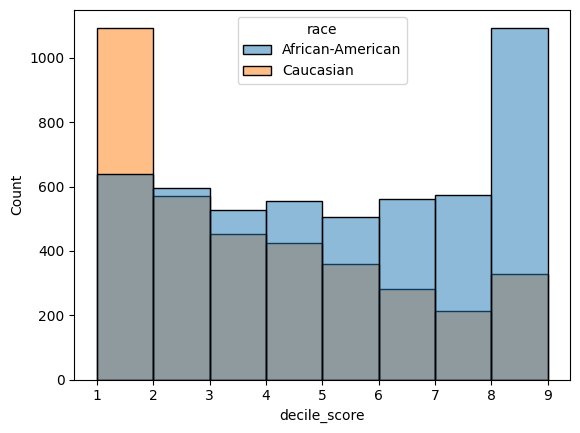

In [ ]:
filtered_race = compas_full[(compas_full.race == 'African-American') | (compas_full.race == 'Caucasian')]
sns.histplot(data=filtered_race, x = 'decile_score', hue='race', bins=range(1, 10, 1))

# Question 4: Biases

You realize through a hypothetical source that Northpointe forgot to properly clean their data. You can interpret this in any way. Given your interpretation, what form of bias would this be categorized as?

**Question 4.1** What are other sources of bias both in the process of training this algorithm and running inference?

_ANSWER HERE_

# Concluding questions

**Question 4.2** Read these articles before answering this question, and review your other answers. Please note what parts you changed.

[Washington Post](https://https://www.washingtonpost.com/news/monkey-cage/wp/2016/10/17/can-an-algorithm-be-racist-our-analysis-is-more-cautious-than-propublicas/)

[ProPublica](https://https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm)

Considering everything you have seen, is COMPAS a suitable model?
Finally, what factors motivate people to overlook flaws in this model, despite its use?

_ANSWER HERE_